In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import random

In [2]:
%pip install roboflow
%pip install torch
%pip install opencv-python
%pip install ultralytics  # For YOLOv8 - YOLOv10

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 53.5 MB/s eta 0:00:00


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="pt70EUjoYBV7CXXutLkJ")
project = rf.workspace("void-gtswn").project("stationery-detection-6fvtb")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.87, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to stationery-Detection-2 in yolov8:: 100%|██████████| 367/367 [00:00<00:00, 8720.02it/s]


In [35]:
from ultralytics import YOLO

# Load YOLO model
model = YOLO('yolov8n.pt')
print(dataset.location)
# Train the model on your custom dataset
model.train(data='/content/stationery-Detection-2/data.yaml', epochs=50, imgsz=640)

/content/Penguins-1
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/stationery-Detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

train: Scanning /content/stationery-Detection-2/train/labels.cache... 165 images, 0 backgrounds, 0 corrupt: 100%|██████████| 165/165 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 21, len(boxes) = 177. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/stationery-Detection-2/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 15. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.41G      1.461      3.695        1.8         14        640: 100%|██████████| 11/11 [00:03<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         14         15    0.00466      0.833      0.135     0.0987



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.21G      1.148       3.45      1.556         17        640: 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         14         15     0.0083      0.944      0.142      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.21G       1.07      3.195      1.548         13        640: 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         14         15     0.0066          1      0.259      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.21G      1.096      2.871       1.57         13        640: 100%|██████████| 11/11 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         14         15      0.891     0.0833      0.311      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.21G      1.112      2.632      1.513         16        640: 100%|██████████| 11/11 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.44it/s]


                   all         14         15       0.84      0.139      0.384      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.22G      1.092      2.442      1.519         16        640: 100%|██████████| 11/11 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         14         15      0.625      0.333      0.537      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.22G       1.12      2.352      1.553         11        640: 100%|██████████| 11/11 [00:02<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         14         15      0.281      0.327      0.307      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.22G      1.155      2.359      1.618         14        640: 100%|██████████| 11/11 [00:04<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         14         15      0.125      0.395      0.254      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.22G      1.131      2.194      1.523         16        640: 100%|██████████| 11/11 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         14         15      0.148      0.432      0.283      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.21G      1.129      2.167      1.577         16        640: 100%|██████████| 11/11 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         14         15      0.156      0.267       0.25      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.21G      1.152       2.18      1.579         17        640: 100%|██████████| 11/11 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]


                   all         14         15      0.145       0.45      0.282      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.22G      1.027      2.037      1.481         14        640: 100%|██████████| 11/11 [00:03<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         14         15       0.18      0.446      0.278      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.21G      1.138      1.982      1.573         14        640: 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         14         15      0.256      0.678      0.276      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.21G      1.077      1.892      1.474         14        640: 100%|██████████| 11/11 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         14         15       0.25      0.699      0.419      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.21G      1.047      1.946      1.517          8        640: 100%|██████████| 11/11 [00:04<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         14         15      0.795      0.333      0.387      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.22G       1.07      1.949      1.526         13        640: 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         14         15      0.256      0.496        0.3      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.22G      1.122       1.92       1.56         16        640: 100%|██████████| 11/11 [00:03<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         14         15      0.297      0.489      0.265      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.22G      1.031      1.729      1.462         19        640: 100%|██████████| 11/11 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         14         15      0.199       0.43      0.316      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.21G      1.041      1.769      1.467         14        640: 100%|██████████| 11/11 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         14         15      0.206        0.4      0.284      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.21G      1.047      1.714      1.488         17        640: 100%|██████████| 11/11 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]


                   all         14         15      0.563      0.336       0.41      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.22G     0.9436      1.635      1.421         12        640: 100%|██████████| 11/11 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         14         15      0.342        0.4      0.452      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.22G     0.9969      1.698      1.441         16        640: 100%|██████████| 11/11 [00:04<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         14         15      0.554      0.381      0.494      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       2.2G     0.9646      1.616      1.421         14        640: 100%|██████████| 11/11 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         14         15      0.385        0.4      0.433      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.22G     0.9709      1.539      1.436         14        640: 100%|██████████| 11/11 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.78it/s]


                   all         14         15      0.769      0.388      0.436      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.22G      1.015      1.686      1.488          7        640: 100%|██████████| 11/11 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         14         15      0.658      0.383      0.408      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.22G      0.977       1.56      1.448          7        640: 100%|██████████| 11/11 [00:03<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         14         15      0.521      0.449      0.397      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       2.2G     0.9386      1.577      1.416          8        640: 100%|██████████| 11/11 [00:04<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         14         15      0.559      0.333      0.457      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.22G     0.9651      1.476      1.399         11        640: 100%|██████████| 11/11 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         14         15      0.791      0.333      0.455      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.22G     0.9548      1.418      1.393         14        640: 100%|██████████| 11/11 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all         14         15      0.669      0.333      0.461      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.22G     0.9656      1.442      1.404         13        640: 100%|██████████| 11/11 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         14         15      0.452      0.295      0.398      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.21G     0.8665      1.324      1.346         13        640: 100%|██████████| 11/11 [00:03<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         14         15      0.608       0.37      0.408      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.22G     0.8753      1.339      1.355         13        640: 100%|██████████| 11/11 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         14         15      0.596        0.4      0.512      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.21G     0.9229      1.385      1.388         12        640: 100%|██████████| 11/11 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all         14         15      0.414      0.511      0.534      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.22G      0.888      1.292      1.368         13        640: 100%|██████████| 11/11 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         14         15      0.625      0.349      0.457      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.21G     0.9035       1.28      1.362         18        640: 100%|██████████| 11/11 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         14         15      0.866      0.372      0.536      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.22G     0.8868      1.288      1.348         15        640: 100%|██████████| 11/11 [00:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         14         15      0.573      0.615      0.602      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.22G     0.8333      1.269      1.318         12        640: 100%|██████████| 11/11 [00:02<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         14         15      0.658      0.422      0.559       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.22G     0.8372        1.3      1.352          7        640: 100%|██████████| 11/11 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         14         15      0.751      0.447      0.487      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.2G     0.8889      1.285      1.335         12        640: 100%|██████████| 11/11 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.75it/s]

                   all         14         15      0.818      0.448      0.493      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.22G     0.7602       1.17      1.262         10        640: 100%|██████████| 11/11 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         14         15      0.847      0.446      0.512      0.386


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       2.2G     0.7376       1.48      1.358          5        640: 100%|██████████| 11/11 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         14         15      0.673      0.485      0.581      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.19G     0.7349      1.365       1.35          7        640: 100%|██████████| 11/11 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         14         15      0.692      0.433      0.553      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.19G     0.7221      1.322      1.381          5        640: 100%|██████████| 11/11 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         14         15        0.9      0.429      0.558      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.2G     0.6691      1.212      1.344          5        640: 100%|██████████| 11/11 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         14         15      0.786      0.446      0.547      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       2.2G     0.6361      1.138      1.238          5        640: 100%|██████████| 11/11 [00:03<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         14         15      0.754      0.465      0.542      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.2G     0.6078      1.072      1.241          5        640: 100%|██████████| 11/11 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         14         15      0.823      0.478      0.556      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.19G     0.5938      1.084      1.254          5        640: 100%|██████████| 11/11 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         14         15      0.843      0.439      0.538      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       2.2G     0.5947      1.132      1.249          5        640: 100%|██████████| 11/11 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         14         15      0.858      0.439      0.531      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.2G     0.5602      1.107       1.21          5        640: 100%|██████████| 11/11 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         14         15      0.759       0.44      0.521      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.19G     0.5845      1.128      1.274          5        640: 100%|██████████| 11/11 [00:04<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         14         15      0.459      0.522      0.537      0.435



50 epochs completed in 0.064 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]


                   all         14         15      0.672      0.484      0.581      0.457
                   pen          2          2       0.77        0.5      0.586      0.506
                pencil          2          2      0.841          1      0.995      0.697
                rubber          3          3          1      0.509      0.666      0.566
                 ruler          1          1          0          0     0.0765     0.0612
               scissor          2          2       0.42        0.5      0.572      0.534
             sharpener          5          5          1      0.397      0.588      0.378
Speed: 0.2ms preprocess, 3.2ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7de315d06350>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [36]:
metrics = model.val()

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/stationery-Detection-2/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 15. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


                   all         14         15      0.673      0.484      0.581      0.457
                   pen          2          2      0.773        0.5      0.586      0.506
                pencil          2          2      0.844          1      0.995      0.697
                rubber          3          3          1      0.507      0.666      0.566
                 ruler          1          1          0          0     0.0765     0.0612
               scissor          2          2      0.424        0.5      0.572      0.534
             sharpener          5          5          1      0.396      0.588      0.378
Speed: 0.3ms preprocess, 5.6ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to runs/detect/train32


In [15]:
# Generating results
results = model.predict(source='/content/stationery-Detection-2/valid/images', save=True, imgsz=640)



image 1/14 /content/stationery-Detection-2/valid/images/pen-1-_png.rf.418add2c3eac4441ea43d37ed8ea8fe0.jpg: 640x640 (no detections), 9.4ms
image 2/14 /content/stationery-Detection-2/valid/images/pen-5-_png.rf.2ddf4b78b56a22813ccb5246e74d4cba.jpg: 640x640 1 pen, 7.2ms
image 3/14 /content/stationery-Detection-2/valid/images/pencil-7-_png.rf.38cfb23accab5c2cd571777d62a96ce7.jpg: 640x640 1 pencil, 7.2ms
image 4/14 /content/stationery-Detection-2/valid/images/rubber-5-_png.rf.46398712448acfb9364220e301fee0c1.jpg: 640x640 1 sharpener, 7.7ms
image 5/14 /content/stationery-Detection-2/valid/images/rubber-6-_png.rf.a8d38e54c131271749e03b1c8fd190f2.jpg: 640x640 1 rubber, 7.2ms
image 6/14 /content/stationery-Detection-2/valid/images/ruler-3-_png.rf.d2d24f53071d64e82b09e1de0952ad75.jpg: 640x640 (no detections), 7.2ms
image 7/14 /content/stationery-Detection-2/valid/images/scissor-3-_png.rf.18c211637c206ecd29fbb9151bec60c0.jpg: 640x640 (no detections), 7.2ms
image 8/14 /content/stationery-Detectio

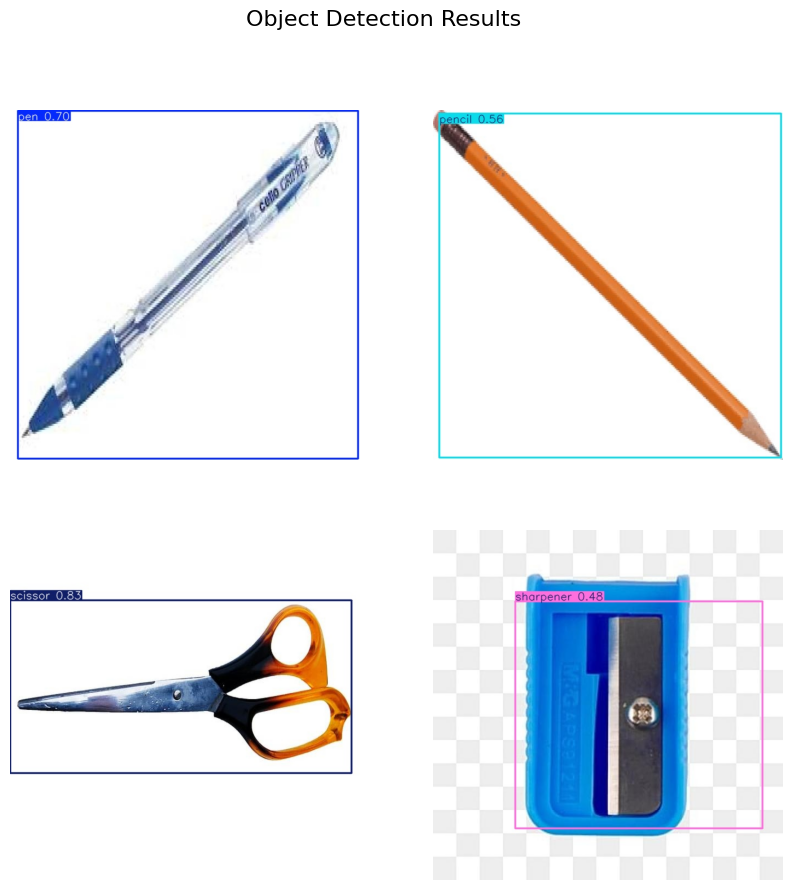

In [37]:

from PIL import Image
import os
import random

results_dir = '/content/runs/detect/train25'

image_files = os.listdir(results_dir)
random_image = random.choice(image_files)

img1 = Image.open('/content/runs/detect/train25/pen-5-_png.rf.2ddf4b78b56a22813ccb5246e74d4cba.jpg')
img2 = Image.open('/content/runs/detect/train25/pencil-7-_png.rf.38cfb23accab5c2cd571777d62a96ce7.jpg')
img3 = Image.open('/content/runs/detect/train25/scissor-9-_png.rf.0256a1b0ae09c4ff828292cb42ce2a05.jpg')
img4 = Image.open('/content/runs/detect/train25/sharpener-2-_png.rf.87509757cada7463609d76adda526124.jpg')

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0,0].imshow(img1)
axes[0,1].imshow(img2)
axes[1,0].imshow(img3)
axes[1,1].imshow(img4)

for ax in axes.flat:
    ax.axis('off')

plt.suptitle("Object Detection Results", fontsize=16)
plt.show()